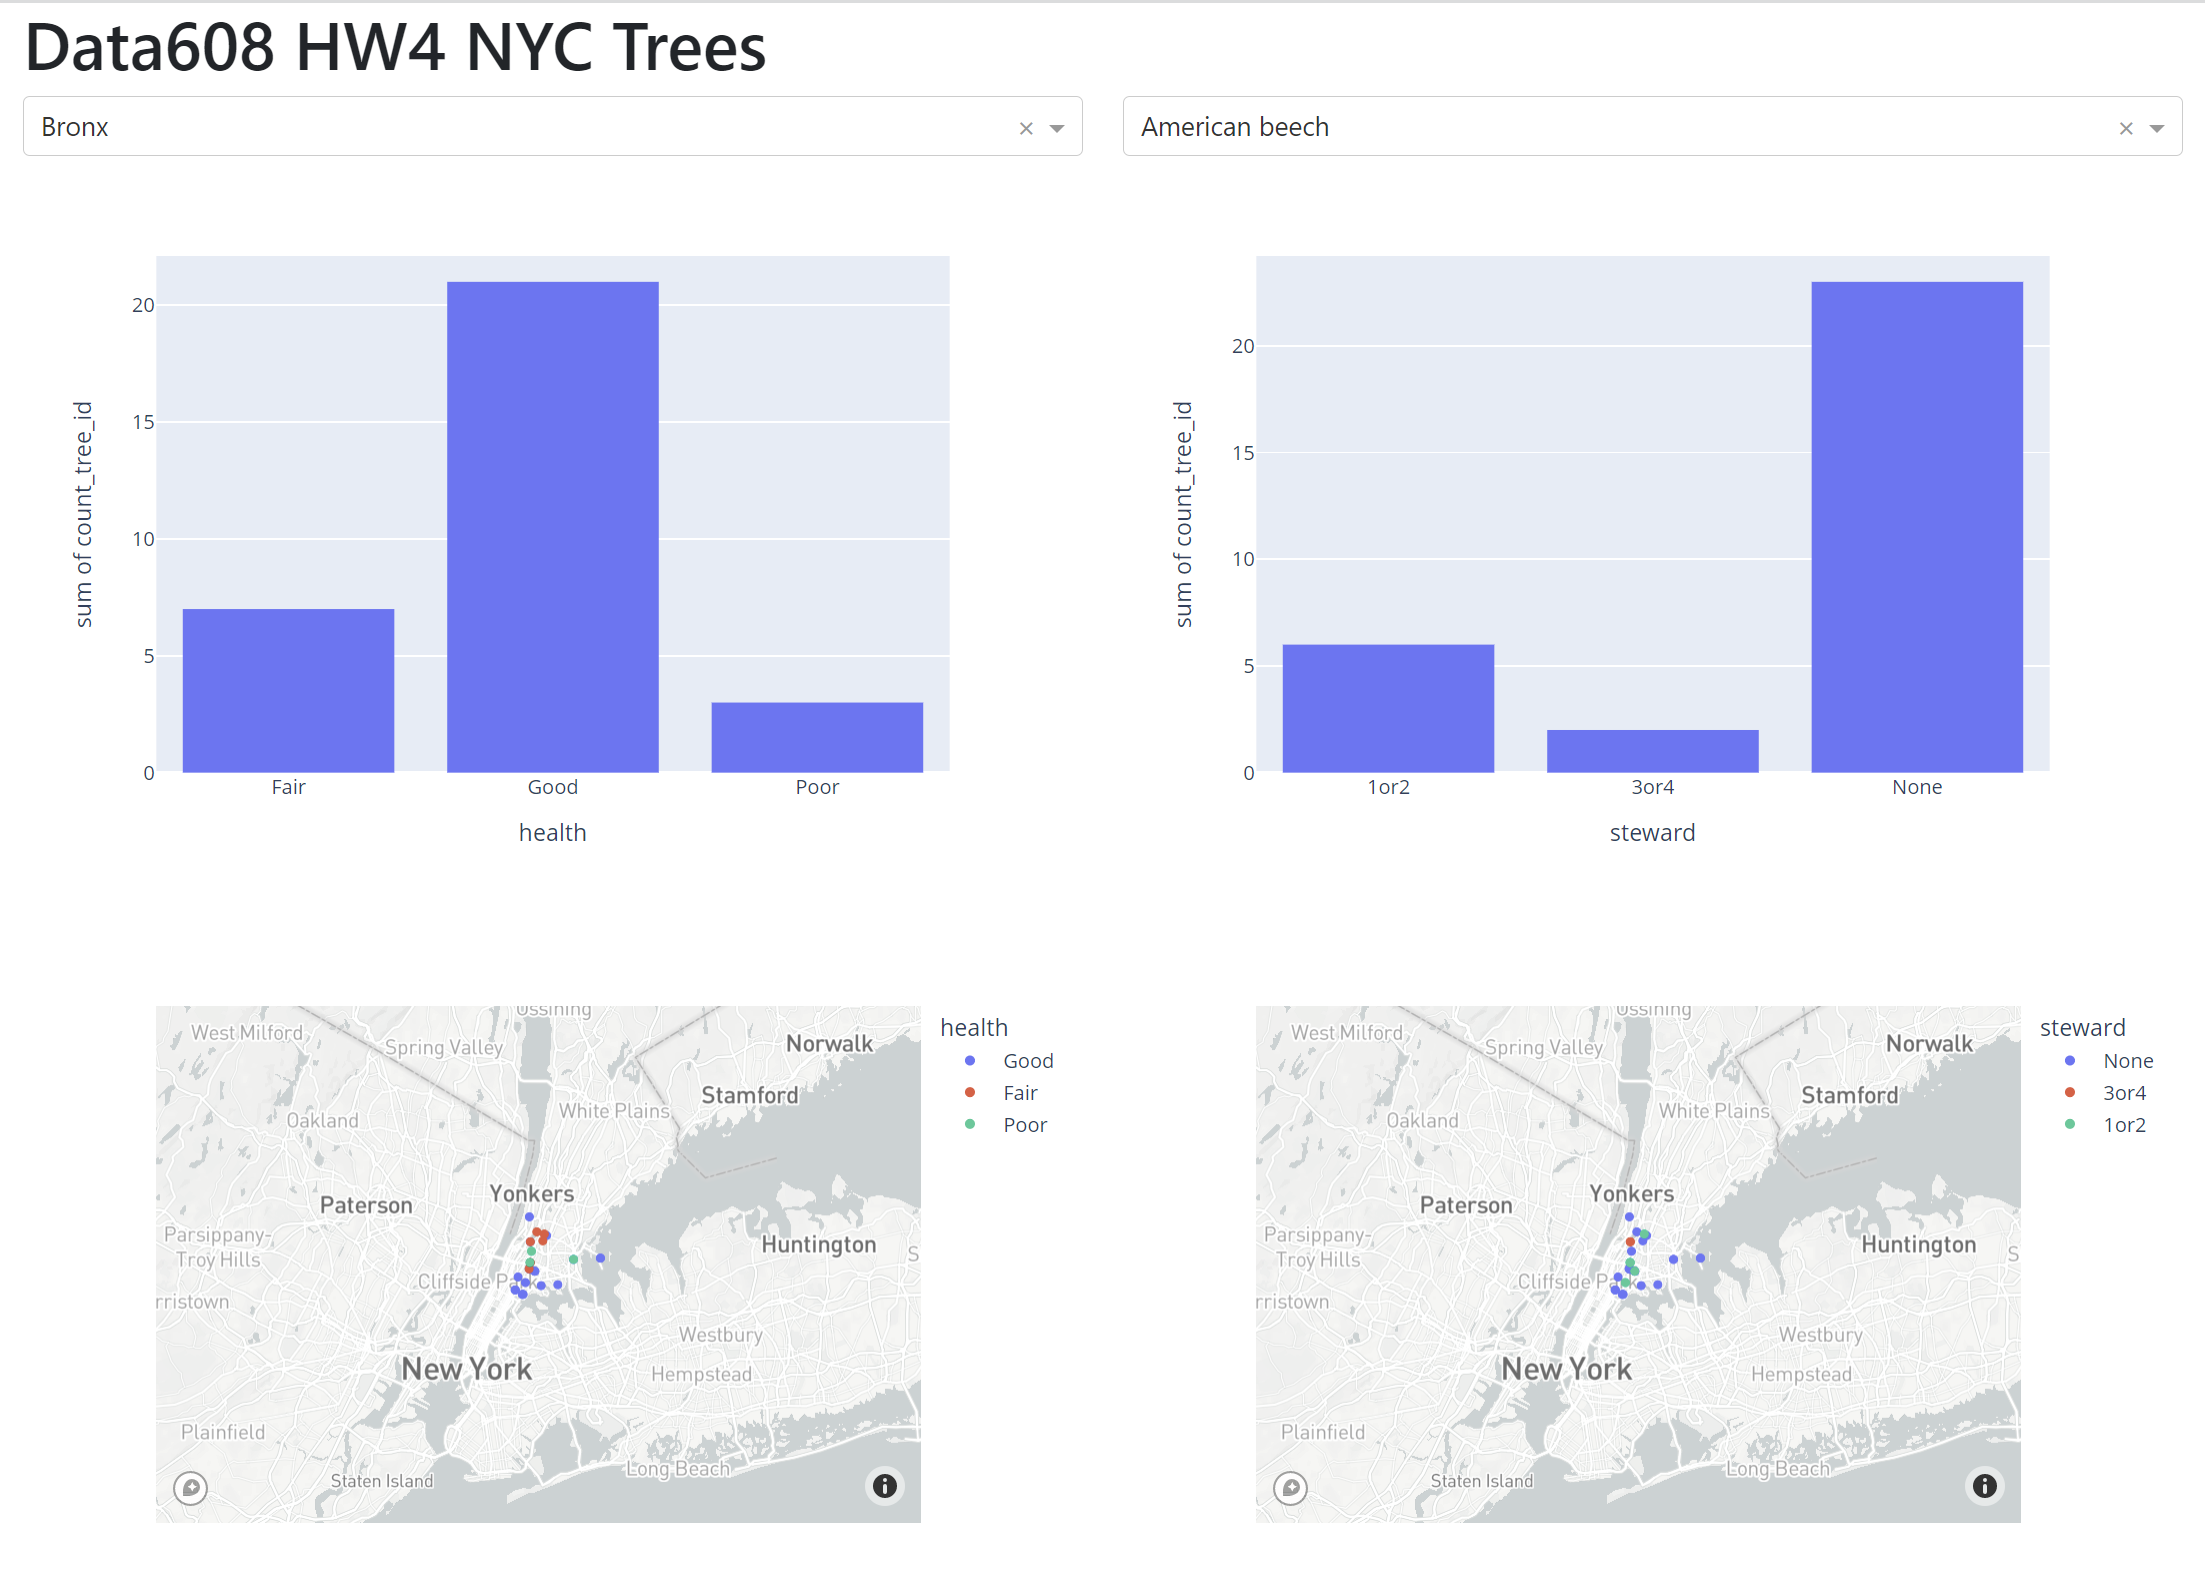

In [1]:
from dash import Dash, html, dcc
import dash
import plotly.graph_objects as go
import plotly.express as px
from dash.dependencies import Input, Output
import pandas as pd
import datetime as dt
import dash_bootstrap_components as dbc

import geopandas
import geoplot
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

import plotly.graph_objects as go


In [2]:
#######################################################
#  All queries I think I will need
#######################################################

In [3]:
# This will give you all Tree species and its count
soql_url = ('https://data.cityofnewyork.us/resource/nwxe-4ae8.json?' +\
        '$select=spc_common,count(tree_id)' +\
        '&$group=spc_common').replace(' ', '%20')
soql_treesT = pd.read_json(soql_url)

soql_treesT.dropna(inplace=True)
soql_treesT

,spc_common,count_tree_id
0,American beech,273
1,American elm,7975
2,American hophornbeam,1081
3,American hornbeam,1517
4,American larch,46
...,...,...
127,weeping willow,282
128,white ash,1121
129,white oak,1686
130,white pine,202


In [4]:
# This will giver all count of all Boros and its tree count
soql_url = ('https://data.cityofnewyork.us/resource/nwxe-4ae8.json?' +\
        '$select=boroname,count(tree_id)' +\
        '&$group=boroname').replace(' ', '%20')
soql_treesB = pd.read_json(soql_url)

soql_treesB

,boroname,count_tree_id
0,Bronx,85203
1,Brooklyn,177293
2,Manhattan,65423
3,Queens,250551
4,Staten Island,105318


In [5]:
# This will give you a count by Steward count
soql_url = ('https://data.cityofnewyork.us/resource/nwxe-4ae8.json?' +\
        '$select=steward,count(tree_id)' +\
        '&$group=steward').replace(' ', '%20')

soql_treesS = pd.read_json(soql_url)

soql_treesS.dropna(inplace=True)
soql_treesS


,steward,count_tree_id
0,1or2,143557
1,3or4,19183
2,4orMore,1610
3,None,487823


In [6]:
# This will give you a count by Health
soql_url = ('https://data.cityofnewyork.us/resource/nwxe-4ae8.json?' +\
        '$select=health,count(tree_id)' +\
        '&$group=health').replace(' ', '%20')

soql_treesH = pd.read_json(soql_url)

soql_treesH.dropna(inplace=True)
soql_treesH

,health,count_tree_id
0,Fair,96504
1,Good,528850
2,Poor,26818


In [7]:
boroN = 'Bronx'
spcN = 'honeylocust'

#old
soql_url = ('https://data.cityofnewyork.us/resource/nwxe-4ae8.json?' +\
        '$select=health,count(tree_id)' +\
        '&$where=boroname=\'Bronx\' AND spc_common=\'honeylocust\'' +\
        '&$group=health').replace(' ', '%20')

#NEW with variables
soql_url = ('https://data.cityofnewyork.us/resource/nwxe-4ae8.json?' +\
        '$select=health,count(tree_id)' +\
        '&$where=boroname=\'{0}\' AND spc_common=\'{1}\'' +\
        '&$group=health').format(boroN,spcN).replace(' ', '%20')


soql_trees1 = pd.read_json(soql_url)

soql_trees1


,health,count_tree_id
0,Good,8575
1,Poor,167
2,Fair,949


In [8]:
boroN = 'Bronx'
spcN = 'honeylocust'

soql_url = ('https://data.cityofnewyork.us/resource/nwxe-4ae8.json?' +\
        '$select=steward,count(tree_id)' +\
        '&$where=boroname=\'{0}\' AND spc_common=\'{1}\'' +\
        '&$group=steward').format(boroN,spcN).replace(' ', '%20')
soql_trees2 = pd.read_json(soql_url)

soql_trees2


,steward,count_tree_id
0,3or4,36
1,4orMore,6
2,1or2,1574
3,None,8075


In [9]:
###################################################################################################

In [10]:
borolist = soql_treesB['boroname']
borolist

0            Bronx
1         Brooklyn
2        Manhattan
3           Queens
4    Staten Island
Name: boroname, dtype: object

In [11]:
borolistdf = pd.DataFrame({
    'c' : borolist
})
borolistdf

,c
0,Bronx
1,Brooklyn
2,Manhattan
3,Queens
4,Staten Island


In [12]:
optionsB = [ 
    {'label': i, 'value':i} for i in borolistdf['c']
]

optionsB

[{'label': 'Bronx', 'value': 'Bronx'},
 {'label': 'Brooklyn', 'value': 'Brooklyn'},
 {'label': 'Manhattan', 'value': 'Manhattan'},
 {'label': 'Queens', 'value': 'Queens'},
 {'label': 'Staten Island', 'value': 'Staten Island'}]

In [13]:
spclistdf = pd.DataFrame({
    'c' : soql_treesT['spc_common']
})

optionsSpc = [ 
    {'label': i, 'value':i} for i in spclistdf['c']
]

optionsSpc

[{'label': 'American beech', 'value': 'American beech'},
 {'label': 'American elm', 'value': 'American elm'},
 {'label': 'American hophornbeam', 'value': 'American hophornbeam'},
 {'label': 'American hornbeam', 'value': 'American hornbeam'},
 {'label': 'American larch', 'value': 'American larch'},
 {'label': 'American linden', 'value': 'American linden'},
 {'label': 'Amur cork tree', 'value': 'Amur cork tree'},
 {'label': 'Amur maackia', 'value': 'Amur maackia'},
 {'label': 'Amur maple', 'value': 'Amur maple'},
 {'label': 'arborvitae', 'value': 'arborvitae'},
 {'label': 'ash', 'value': 'ash'},
 {'label': 'Atlantic white cedar', 'value': 'Atlantic white cedar'},
 {'label': 'Atlas cedar', 'value': 'Atlas cedar'},
 {'label': 'bald cypress', 'value': 'bald cypress'},
 {'label': 'bigtooth aspen', 'value': 'bigtooth aspen'},
 {'label': 'black cherry', 'value': 'black cherry'},
 {'label': 'blackgum', 'value': 'blackgum'},
 {'label': 'black locust', 'value': 'black locust'},
 {'label': 'black 

In [14]:
###################################################################################################

In [ ]:
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = dbc.Container([
    dbc.Row([
       dbc.Col([html.H1("Data608 HW4 NYC Trees")
       ])
    ], justify="center"),
    
    dbc.Row([dbc.Col(dcc.Dropdown( id = 'boroN',
        options = optionsB,
        value = 'Bronx')),
             
             dbc.Col(dcc.Dropdown( id = 'speciesN',
        options = optionsSpc,
        value = optionsSpc[0]["value"]))]),
    
    dbc.Row([dbc.Col(dcc.Graph(id = 'bar_plot')),
             
             dbc.Col(dcc.Graph(id = 'bar_plot2'))]),
    
    dbc.Row([dbc.Col(dcc.Graph(id = 'geo_plot1')),
             
             dbc.Col(dcc.Graph(id = 'geo_plot2'))]),

    dbc.Row([dbc.Col([dbc.Row(html.H4("Appendix 1")),
                      dbc.Row(dcc.Graph(id = 'table1'))]),
             
             dbc.Col([dbc.Row(html.H4("Appendix 2")),
                      dbc.Row(dcc.Graph(id = 'table2'))])]),

])
    
    
@app.callback(Output(component_id='bar_plot', component_property= 'figure'),
              Input('boroN','value'),
              Input('speciesN','value'))

def graph_update(dBoro,dSpc):

    #NEW with variables
    soql_url = ('https://data.cityofnewyork.us/resource/nwxe-4ae8.json?' +\
        '$select=health,count(tree_id)' +\
        '&$where=boroname=\'{0}\' AND spc_common=\'{1}\'' +\
        '&$group=health').format(dBoro,dSpc).replace(' ', '%20')

    soql_trees1 = pd.read_json(soql_url)

    
    fig = px.histogram(soql_trees1, x="health", y="count_tree_id")

    fig.update_layout(
        title="Health of Trees by Species by Boro",
        xaxis_title="Health of Trees",
        yaxis_title="Number of Trees",
        legend_title="Health",
        font=dict(
            family="Garamond",
            size=14,
            color="Black"
        )
    )

    return fig

@app.callback(Output(component_id='bar_plot2', component_property= 'figure'),
              Input('boroN','value'),
              Input('speciesN','value'))

def graph_update2(dBoro,dSpc):

    #NEW with variables
    soql_url2 = ('https://data.cityofnewyork.us/resource/nwxe-4ae8.json?' +\
        '$select=steward,count(tree_id)' +\
        '&$where=boroname=\'{0}\' AND spc_common=\'{1}\'' +\
        '&$group=steward').format(dBoro,dSpc).replace(' ', '%20')

    soql_trees2 = pd.read_json(soql_url2)

    fig2 = px.histogram(soql_trees2, x="steward", y="count_tree_id")
 
    fig2.update_layout(
        title="Steward of Trees by Species by Boro",
        xaxis_title="Steward of Trees",
        yaxis_title="Number of Trees",
        legend_title="Steward",
        font=dict(
            family="Garamond",
            size=14,
            color="Black"
        )
    )

    return fig2


@app.callback(Output(component_id='geo_plot1', component_property= 'figure'),
              Input('boroN','value'),
              Input('speciesN','value'))

def graph_update3(dBoro,dSpc):

    #NEW with variables
    soql_url3 = ('https://data.cityofnewyork.us/resource/nwxe-4ae8.json?$limit=10000&$offset=0' +\
        '&$where=boroname=\'{0}\' AND spc_common=\'{1}\'').format(dBoro,dSpc).replace(' ', '%20')
    soql_trees3 = pd.read_json(soql_url3)
  
    px.set_mapbox_access_token("pk.eyJ1IjoianJmYWxjayIsImEiOiJjbGZkYzRjZ28wZWttM3FycmV2dXhxZjByIn0.47UNH0enC4D63f7R9vgBMg")
    fig3 = px.scatter_mapbox(soql_trees3, lat="latitude", lon="longitude",color="health")
 
    fig3.update_layout(
        title="Location of Trees by Species by Boro",
        font=dict(
            family="Garamond",
            size=14,
            color="Black"
        )
    )

    return fig3

@app.callback(Output(component_id='geo_plot2', component_property= 'figure'),
              Input('boroN','value'),
              Input('speciesN','value'))

def graph_update4(dBoro,dSpc):

    #NEW with variables
    soql_url4 = ('https://data.cityofnewyork.us/resource/nwxe-4ae8.json?$limit=10000&$offset=0' +\
        '&$where=boroname=\'{0}\' AND spc_common=\'{1}\'').format(dBoro,dSpc).replace(' ', '%20')
    soql_trees4 = pd.read_json(soql_url4)
  
    px.set_mapbox_access_token("pk.eyJ1IjoianJmYWxjayIsImEiOiJjbGZkYzRjZ28wZWttM3FycmV2dXhxZjByIn0.47UNH0enC4D63f7R9vgBMg")
    fig4 = px.scatter_mapbox(soql_trees4, lat="latitude", lon="longitude",color="steward")

    fig4.update_layout(
        title="Location of Trees by Species by Boro",
        font=dict(
            family="Garamond",
            size=14,
            color="Black"
        )
    )
    
    return fig4


@app.callback(Output(component_id='table1', component_property= 'figure'),
              Input('boroN','value'),
              Input('speciesN','value'))
def table_update1(dBoro,dSpc):

    #NEW with variables

    soql_url = ('https://data.cityofnewyork.us/resource/nwxe-4ae8.json?' +\
            '$select=spc_common,count(tree_id)' +\
            '&$where=boroname=\'{0}\'' +\
            '&$group=spc_common').format(dBoro).replace(' ', '%20')


    soql_treesBC = pd.read_json(soql_url)

    soql_treesBC.sort_values(by=['count_tree_id'], ascending=False,inplace=True)
    

    fig5 = go.Figure(data=[go.Table(
    header=dict(values=list(soql_treesBC.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[soql_treesBC.spc_common, soql_treesBC.count_tree_id],
               fill_color='lavender',
               align='left'))
                          ])
    fig5.update_layout(
        title="Count of all trees by species in the Boro",
        font=dict(
            family="Garamond",
            size=14,
            color="Black"
        )
    )

    return fig5


@app.callback(Output(component_id='table2', component_property= 'figure'),
              Input('boroN','value'),
              Input('speciesN','value'))

def table_update2(dBoro,dSpc):

    #NEW with variables

    soql_url = ('https://data.cityofnewyork.us/resource/nwxe-4ae8.json?' +\
            '$select=boroname,count(tree_id)' +\
            '&$where=spc_common=\'{0}\'' +\
            '&$group=boroname').format(dSpc).replace(' ', '%20')

    soql_treesBSN = pd.read_json(soql_url)
    soql_treesBSN.sort_values(by=['count_tree_id'], ascending=False,inplace=True)
    

    fig6 = go.Figure(data=[go.Table(
    header=dict(values=list(soql_treesBSN.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[soql_treesBSN.boroname,soql_treesBSN.count_tree_id],
               fill_color='lavender',
               align='left'))
                          ])

    fig6.update_layout(
        title="Count of trees of this species in all Boros",
        font=dict(
            family="Garamond",
            size=14,
            color="Black"
        )
    )
    
    return fig6


######################
if __name__ == '__main__': 
    app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: on


In [15]:
##############################################################################################################################

In [16]:
###############################################################################################################################
###############################################################################################################################

import geopandas
import geoplot
import pandas as pd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt



In [17]:

boro = 'Bronx'
species= "honeylocust"

soql_url = ('https://data.cityofnewyork.us/resource/nwxe-4ae8.json?$limit=10000&$offset=0' +\
        '&$where=boroname=\'Bronx\' AND spc_common=\'honeylocust\'').replace(' ', '%20')
soql_trees = pd.read_json(soql_url)

soql_trees

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council_district,census_tract,bin,bbl
0,184375,505172,2015-08-29,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,2037504,New York,40.847947,-73.893382,1013747.443,248225.3822,17.0,37504.0,2011964.0,2.030680e+09
1,186060,505600,2015-08-29,17,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,2038302,New York,40.857918,-73.893406,1013736.366,251858.2106,15.0,38302.0,2011206.0,2.030310e+09
2,201682,515571,2015-09-04,11,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,2044200,New York,40.903400,-73.849367,1025890.264,268446.8536,11.0,442.0,2100038.0,2.051120e+09
3,183942,504242,2015-08-29,3,0,OnCurb,Alive,Fair,Gleditsia triacanthos var. inermis,honeylocust,...,2038100,New York,40.853922,-73.901374,1011533.898,250399.7453,15.0,23502.0,2013681.0,2.031560e+09
4,196020,506702,2015-09-01,2,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,2026701,New York,40.869988,-73.901626,1011457.802,256252.8990,14.0,26701.0,2015276.0,2.032480e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9686,183937,504242,2015-08-29,4,0,OnCurb,Alive,Fair,Gleditsia triacanthos var. inermis,honeylocust,...,2038100,New York,40.853433,-73.901546,1011486.647,250221.2946,15.0,381.0,2013689.0,2.031560e+09
9687,184320,505563,2015-08-29,4,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,2038700,New York,40.856336,-73.890875,1014437.396,251282.6730,15.0,387.0,2011698.0,2.030550e+09
9688,185310,505615,2015-08-29,7,0,OnCurb,Alive,Fair,Gleditsia triacanthos var. inermis,honeylocust,...,2038500,New York,40.857798,-73.891844,1014168.544,251814.9347,15.0,385.0,2011398.0,2.030400e+09
9689,196021,506702,2015-09-01,2,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,2026701,New York,40.869899,-73.901689,1011440.370,256220.5093,14.0,26701.0,2015276.0,2.032480e+09


In [18]:
#store_locDF=pd.read_csv('stores.csv')
#cols_to_keep=['store_longitude','store_latitude']

crs={'init':'epsg:4326'}

boroughs = geopandas.read_file(geoplot.datasets.get_path('nyc_boroughs'))

geo_df=geopandas.GeoDataFrame(soql_trees,crs=crs,geometry=geopandas.points_from_xy(soql_trees["longitude"], soql_trees["latitude"]))



D:\ComputerCode\JF_Environments\dash-env\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


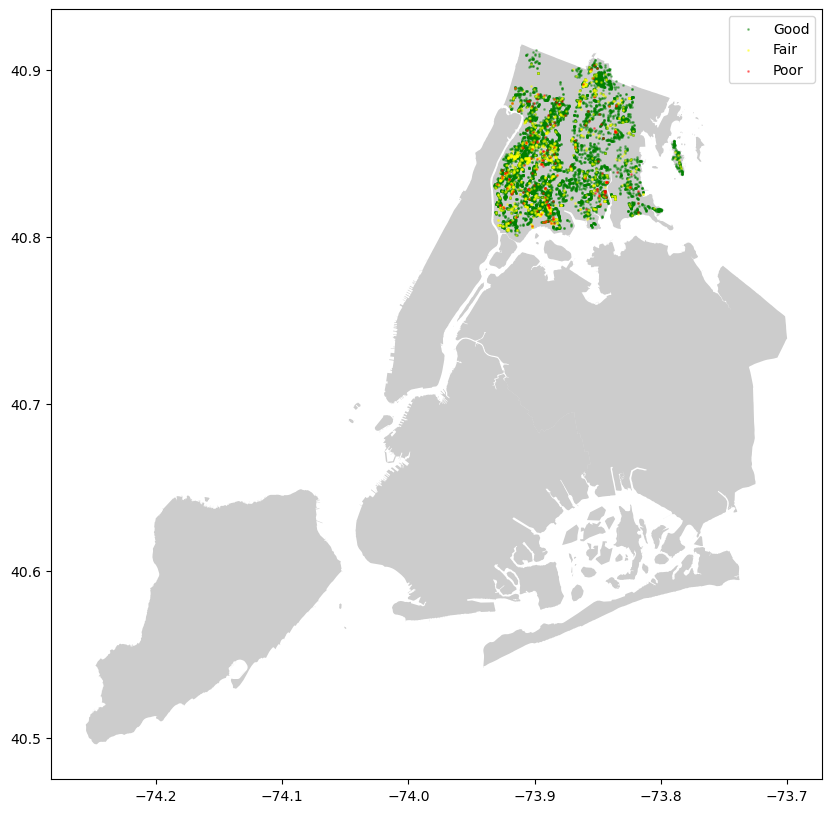

In [19]:
fig,ax=plt.subplots(figsize=(10,10))
boroughs.plot(ax=ax,alpha=0.4,color="grey")
geo_df[geo_df['health']=="Good"].plot(ax=ax,markersize=1, alpha=0.4,color="green", label="Good")
geo_df[geo_df['health']=="Fair"].plot(ax=ax,markersize=1, alpha=0.4,color="yellow",label="Fair")
geo_df[geo_df['health']=="Poor"].plot(ax=ax,markersize=1, alpha=0.4,color="red",label="Poor")
plt.legend()
             

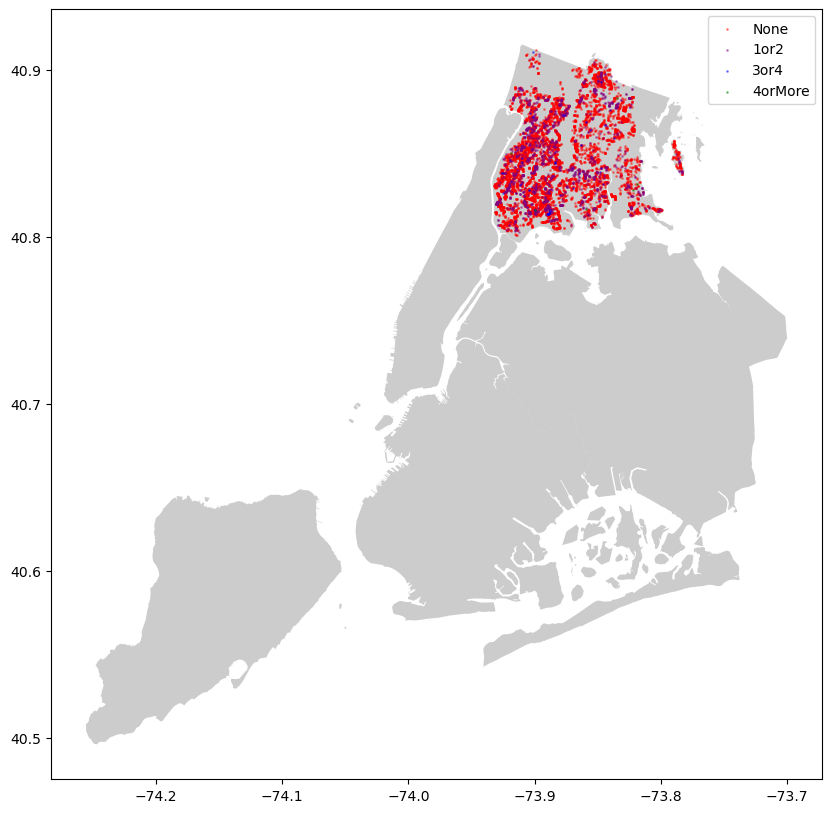

In [20]:
fig2,ax2=plt.subplots(figsize=(10,10))
boroughs.plot(ax=ax2,alpha=0.4,color="grey")
geo_df[geo_df['steward']=="None"].plot(ax=ax2,markersize=1, alpha=0.4,color="red", label="None")
geo_df[geo_df['steward']=="1or2"].plot(ax=ax2,markersize=1, alpha=0.4,color="purple", label="1or2")
geo_df[geo_df['steward']=="3or4"].plot(ax=ax2,markersize=1, alpha=0.4,color="blue", label="3or4")
geo_df[geo_df['steward']=="4orMore"].plot(ax=ax2,markersize=1, alpha=0.4,color="green", label="4orMore")

plt.legend()


In [21]:
import sys
print(sys.version)

3.11.0 | packaged by conda-forge | (main, Oct 25 2022, 06:12:32) [MSC v.1929 64 bit (AMD64)]


In [14]:
#####################################################################################################################
#####################################################################################################################

In [23]:
boroN = "Bronx"

soql_url = ('https://data.cityofnewyork.us/resource/nwxe-4ae8.json?' +\
        '$select=spc_common,count(tree_id)' +\
        '&$where=boroname=\'{0}\'' +\
        '&$group=spc_common').format(boroN).replace(' ', '%20')


soql_treesBC = pd.read_json(soql_url)

soql_treesBC.sort_values(by=['count_tree_id'], ascending=False,inplace=True)
soql_treesBC


,count_tree_id,spc_common
56,9691,honeylocust
19,7511,London planetree
52,6445,pin oak
79,4947,Callery pear
53,4638,Japanese zelkova
...,...,...
60,3,pitch pine
33,2,Scots pine
84,2,black pine
37,1,Himalayan cedar


In [22]:

spcN = "cherry"

soql_url = ('https://data.cityofnewyork.us/resource/nwxe-4ae8.json?' +\
        '$select=boroname,count(tree_id)' +\
        '&$where=spc_common=\'{0}\'' +\
        '&$group=boroname').format(spcN).replace(' ', '%20')


soql_treesBSN = pd.read_json(soql_url)
soql_treesBSN.sort_values(by=['count_tree_id'], ascending=False,inplace=True)
soql_treesBSN


,boroname,count_tree_id
0,Queens,13497
1,Brooklyn,5706
3,Staten Island,5115
4,Bronx,4092
2,Manhattan,869


In [ ]:
############################################################################################